<a href="https://colab.research.google.com/github/aayushsss1/Visualizing-Filters-of-a-CNN/blob/main/Visualizing_Filters_of_a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Filters of a Convolutional Neural Network

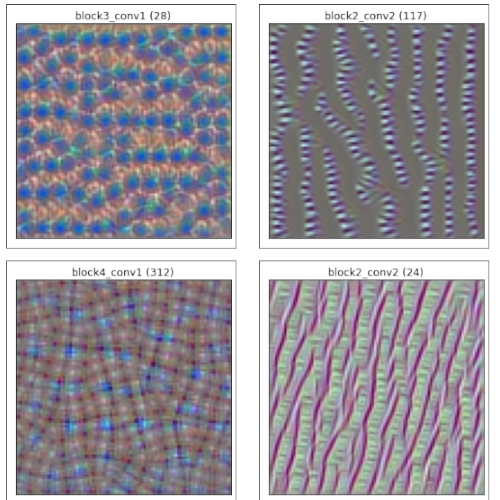

## Task 2: Downloading the Model

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
print('Tensorflow version', tf.__version__)

Tensorflow version 2.6.0


In [ ]:
model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(96, 96, 3))
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

## Task 3: Get Layer Output

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(model.input, model.get_layer(layer_name).output)
get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [ ]:
def create_image():
  return tf.random.uniform((96,96,3), minval=-0.5,maxval=0.5)
def plot_image(image,title='random'):
  image=image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()


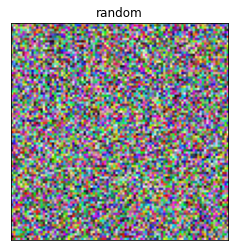

In [ ]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [ ]:
def visualize_filter(layer_name,f_index=None,iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters -1)
  assert num_filters > f_index, 'f_index is out of bounds'

  image = create_image()
  verbose_step = int(iters/10)

  for i in range(0,iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image,axis=0))[:,:,:,f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss,image)
    grads = tf.math.l2_normalize(grads)
    image+= grads*10
    if(i+1)%verbose_step ==0:
      print(f'Iteration:{i+1},Loss:{loss.numpy():4f}')
  plot_image(image, f'{layer_name},{f_index}')

## Task 6: Final Results

In [ ]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration:10,Loss:8.664513
Iteration:20,Loss:16.632086
Iteration:30,Loss:24.660797
Iteration:40,Loss:32.738464
Iteration:50,Loss:40.857376
Iteration:60,Loss:49.011391
Iteration:70,Loss:57.192123
Iteration:80,Loss:65.393883
Iteration:90,Loss:73.613922
Iteration:100,Loss:81.851395


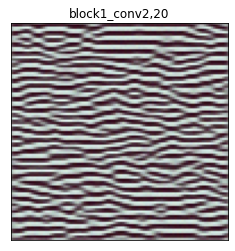

In [ ]:
layer_name = 'block1_conv2' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']
visualize_filter(layer_name, iters=100)